<img src="qiskit_introduction.png" />

In [1]:
# This notebook can be presented as a deck by uncommenting and running:
#!jupyter nbconvert ./qiskit_intro.ipynb --to slides --post serve

# Or by installing RISE: https://damianavila.github.io/RISE/ and using CTRL-R

In [2]:
import qiskit
print("This notebook was created using qiskit version " + qiskit.__version__)

This notebook was created using qiskit version 0.18.1


In [3]:
import warnings
warnings.filterwarnings("ignore")

# Concepts
## Qubits, Gates, Measurement, Phase

<img src="bit_qubit.png" />

<img src="bit_qubit_sphere.png" />

<img src="qubit_states.png" />

<img src="bit_qubit_encoding.png" />

<img src="qubit_gates.png" />

<img src="x_gate.gif" />

<img src="h_gate.gif" />

<img src="measurement.png" />

<img src="superposition.png" />

<img src="phase.png" />

<img src="phase_gate.png" />

<img src="interference.png" />

# Qiskit

<img src="qiskit_1.png" />

<img src="qiskit_2.png" />

<img src="qiskit_3.png" />

<img src="qiskit_4.png" />

## Getting Started with Qiskit

You can start Qiskit locally, following the instructions at https://qiskit.org/ or you get started with Jupyter Notebooks hosted on IBM Quantum Lab at https://lab.quantum-computing.ibm.com.

Quantum gates and circuits are the foundation of quantum computing. 
To code any quantum circuit in Qiskit, you follow three high-level steps:

- **Build**: Design a quantum circuit using gates that represents the problem you are considering.
- **Execute**: Run circuits on a backend, either a system or a simulator.
- **Analyse**: Visualise and analyse the results of your circuit.

In [4]:
# We begin by importing the necessary libraries
from qiskit import *
from qiskit.visualization import *

## Single Qubit Operations - X, H, and Z

### X gate : Not gate

$X = \begin{bmatrix}0 & 1 \\ 1 & 0 \end{bmatrix} , ~~~~~~ XX = I$

$X|0\rangle = |1\rangle ~~~~~~~~~ X|1\rangle = |0\rangle $

<IPython.core.display.Latex object>

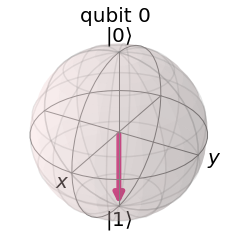

In [5]:
# Build
qc = QuantumCircuit(1, 1)
qc.x(0)
sv = quantum_info.Statevector(qc)
display(array_to_latex(sv, prefix="\\text{Statevector} = "))
plot_bloch_multivector(sv)

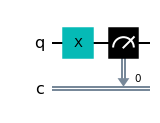

In [6]:
qc.measure(0, 0)
qc.draw('mpl')

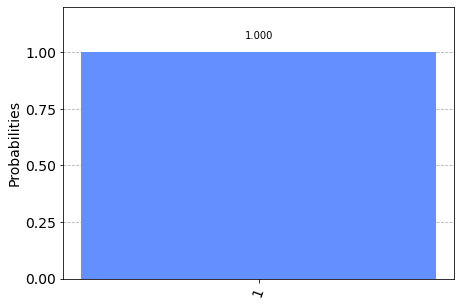

In [7]:
#Execute
simulator = Aer.get_backend('qasm_simulator')
job = execute(qc, simulator)
results = job.result()  # Retrieve the measurement results for the circuit
count = results.get_counts()

#Analyse
plot_histogram(count)

### H gate : Hadamard gate, create superposition

$H = \frac{1}{\sqrt{2}} \begin{bmatrix}1 & 1 \\ 1 & -1 \end{bmatrix} , ~~~~~~  HH = I $

$H|0\rangle = \frac{1}{\sqrt{2}}(|0\rangle + |1\rangle) = |+\rangle ~~~~~~~~~
H|1\rangle = \frac{1}{\sqrt{2}}(|0\rangle - |1\rangle) = |-\rangle$ 

<IPython.core.display.Latex object>

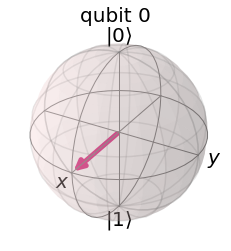

In [8]:
qc = QuantumCircuit(1,1)
qc.h(0)
sv = quantum_info.Statevector(qc)
display(array_to_latex(sv, prefix="\\text{Statevector} = "))
plot_bloch_multivector(sv)

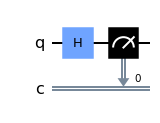

In [9]:
qc.measure(0,0)
qc.draw('mpl')

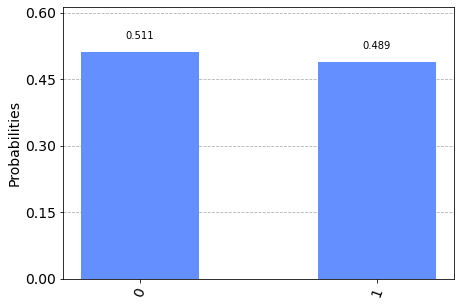

In [10]:
job = execute(qc, simulator)
results = job.result()
count = results.get_counts()
plot_histogram(count)

### Z gate :  create relative phase $\pi$

$Z = \begin{bmatrix}1 & 0 \\ 0 & -1 \end{bmatrix} , ~~~~~~ ZZ=I $

$Z|0\rangle = |0\rangle ~~~~~~~~~
Z|1\rangle = e^{i\pi} |1\rangle = - |1\rangle $ 

<IPython.core.display.Latex object>

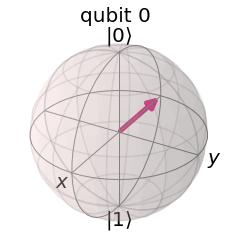

In [11]:
qc = QuantumCircuit(1,1)
qc.h(0)
qc.z(0)
sv = quantum_info.Statevector(qc)
display(array_to_latex(sv, prefix="\\text{Statevector} = "))
plot_bloch_multivector(sv)

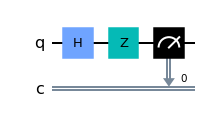

In [12]:
qc.measure(0, 0)
qc.draw('mpl')

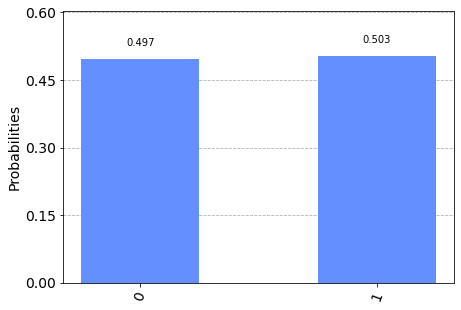

In [13]:
job = execute(qc, simulator)
results = job.result()
count = results.get_counts()
plot_histogram(count)

# Concepts
## Composite Systems, Two-Qubit Gates, Entanglement

<img src="composite_systems.png" />

<div class="alert alert-block alert-info">
<b>Note:</b> In many physics textbooks you may see that the qubits in the higher order set in the LSB to the right and the qubits at the lowest order is set as the MSB. In Qiskit we do this opposite to most textbooks.

For example, if qubit zero is in state 0, qubit one is in state 0, and qubit two is in state 1, Qiskit would represent this state as $|100\rangle$, whereas many physics textbooks would represent it as $|001\rangle$.

This aligns with the standard binary sequence order, which means that if we map the state 01 to a classical register that is 01 it has a 1 to 1 relationship with the basis states of the quantum system. 
 </div>

<img src="two_qubit_gates.png" />

<img src="two_qubit_gates_entanglement.png" />

<img src="entanglement.png" />

## Bell State in Qiskit

<IPython.core.display.Latex object>

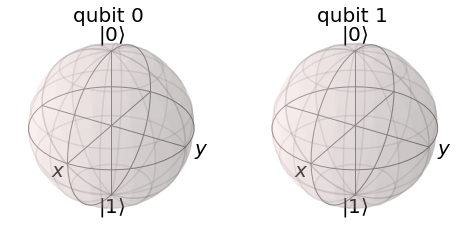

In [14]:
bell = QuantumCircuit(2)
bell.h(0)
bell.cx(0,1)
sv = quantum_info.Statevector(bell)
display(array_to_latex(sv, prefix="\\text{Statevector} = "))
plot_bloch_multivector(sv)

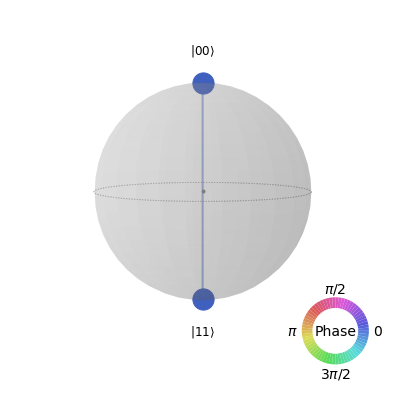

In [15]:
plot_state_qsphere(sv)

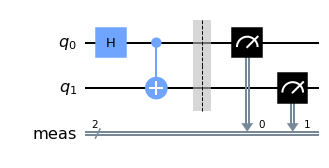

In [16]:
bell.measure_all()
bell.draw('mpl')

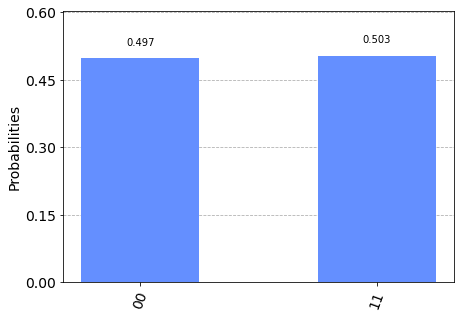

In [17]:
job = execute(bell, simulator)
counts = job.result().get_counts()
plot_histogram(counts)

## Executing on a Quantum Computer

<img src="systems.png" />

To work locally: your [IBM Quantum](https://quantum-computing.ibm.com) token needs to be saved.

In [18]:
from qiskit import IBMQ
#IBMQ.save_account('TOKEN')

### Load your account

In [19]:
provider = IBMQ.load_account()

### Choose a device

In [20]:
# Select all operational devices with more than 2 qubits
backends_sel = provider.backends(filters=lambda x:not x.configuration().simulator and 
                                x.configuration().n_qubits >=2 and x.status().operational==True)
backends_sel

[<IBMQBackend('ibmq_santiago') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_bogota') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_lima') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_belem') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_quito') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_manila') from IBMQ(hub='ibm-q', group='open', project='main')>]

In [21]:
# Select the device with the shortest queue
from qiskit.providers.ibmq import least_busy

backend = least_busy(backends_sel)
backend

<IBMQBackend('ibmq_manila') from IBMQ(hub='ibm-q', group='open', project='main')>

### Execute Bell state on the chosen quantum system

In [22]:
from qiskit.tools.monitor import job_monitor

job = execute(bell, backend)
job_monitor(job)

Job Status: job has successfully run


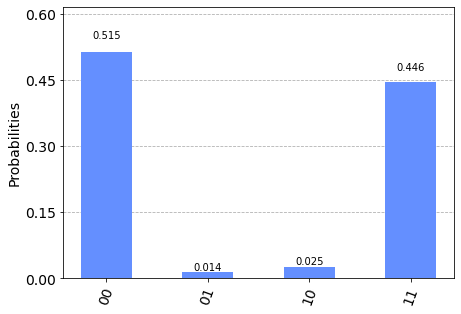

In [23]:
counts = job.result().get_counts()
plot_histogram(counts)

# Deutsch Algorithm

<table>
<tbody>
<tr>
<td colspan="2"><img src="deutsch_problem.png" /></td>
</tr>
<tr>
<td><img src="classic_oracle.png" /></td>
<td><img src="quantum_oracle.png" /></td>
</tr>
</tbody>
</table>

### Oracle 4: Constant zero

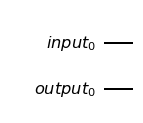

In [24]:
input = QuantumRegister(1, name='input')
output = QuantumRegister(1, name='output')
constant0 = QuantumCircuit(input, output, name='oracle')
oracle4 = constant0.to_instruction()
constant0.draw('mpl')

### Oracle 3: Constant one

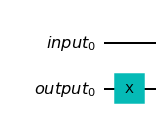

In [25]:
input = QuantumRegister(1, name='input')
output = QuantumRegister(1, name='output')
constant1 = QuantumCircuit(input, output, name='oracle')
constant1.x(output)
oracle3 = constant1.to_instruction()
constant1.draw('mpl')

### Oracle 1: Identity

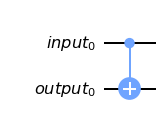

In [26]:
input = QuantumRegister(1, name='input')
output = QuantumRegister(1, name='output')
identity = QuantumCircuit(input, output, name='oracle')
identity.cx(input, output)
oracle1 = identity.to_instruction()
identity.draw('mpl')

### Oracle 2: Invert

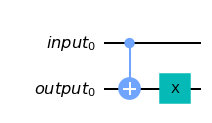

In [27]:
input = QuantumRegister(1, name='input')
output = QuantumRegister(1, name='output')
invert = QuantumCircuit(input, output, name='oracle')
invert.cx(input, output)
invert.x(output)
oracle2 = identity.to_instruction()
invert.draw('mpl')

## Run an oracle

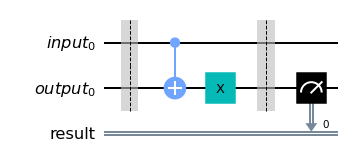

In [28]:
result = ClassicalRegister(1, name='result')
circuit = QuantumCircuit(input, output, result)
# circuit.x(input) # <- set input to 1
circuit.barrier()
circuit.compose(invert, inplace=True) 
circuit.barrier()
circuit.measure(output, result)
circuit.draw('mpl')

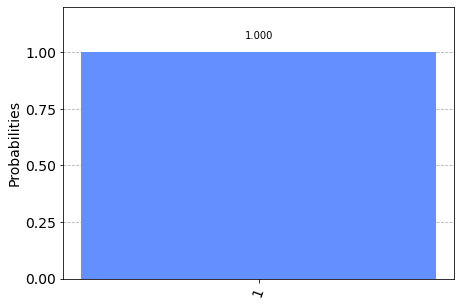

In [29]:
job = execute(circuit, backend=simulator)
counts = job.result().get_counts()
plot_histogram(counts)

## Running Deutsch's Algorithm

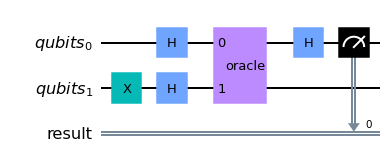

In [30]:
qr = QuantumRegister(2, name='qubits')
cr = ClassicalRegister(1, name='result')
circuit = QuantumCircuit(qr, cr)
circuit.x(qr[1])
circuit.h(qr)
circuit.append(oracle4, [qr[0], qr[1]]) # <-- you can replace here for other oracles
circuit.h(qr[0])
circuit.measure(qr[0], cr[0])
circuit.draw('mpl', justify="right")

In [31]:
counts = execute(circuit, backend=simulator, shots=1).result().get_counts()
counts['BALANCED'] = counts.pop('1', None)
counts['CONSTANT'] = counts.pop('0', None)
counts

{'BALANCED': None, 'CONSTANT': 1}

## Wait... What?! How?! Why?!

The difference between balanced/constant is the existance of a $\text{CNOT}$ gate in the oracle. In essence, the only thing that Deutsch does is **detecting that $\text{CNOT}$**.

How can you detect that CNOT? The oracle box is closed.

Thanks to a trick called *phase kickback*, which is used in many quantum algorithms.

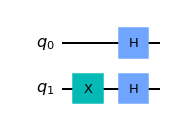

<IPython.core.display.Latex object>

In [32]:
circuit = QuantumCircuit(2)
circuit.h(0)
circuit.x(1)
circuit.h(1)

display(circuit.draw('mpl',justify='right'))
display(array_to_latex(quantum_info.Statevector(circuit), prefix="\\text{Statevector} = "))

$$
\begin{gather*} 
q_1 & q_0 \\
|-\rangle & |+\rangle  \\
(|0\rangle - |1\rangle) & (|0\rangle + |1\rangle)
\end{gather*}\\
|00\rangle + |01\rangle - |10\rangle - |11\rangle
$$

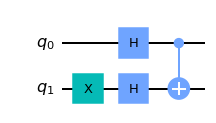

<IPython.core.display.Latex object>

In [33]:
circuit.cx(0, 1)

display(circuit.draw('mpl',justify='right'))
display(array_to_latex(quantum_info.Statevector(circuit), prefix="\\text{Statevector} = "))

$$
\text{initial state} \\
|00\rangle + |01\rangle - |10\rangle - |11\rangle \\
\text{after the CNOT} \\
|00\rangle + |11\rangle - |10\rangle - |01\rangle \\
\text{reordering} \\
|00\rangle - |01\rangle - |10\rangle + |11\rangle \\
\text{factoring} \\
\begin{gather*} 
(|0\rangle - |1\rangle) & (|0\rangle - |1\rangle)\\
|-\rangle & |-\rangle  \\
q_1 & q_0 
\end{gather*}\\
$$
This is very interesting, because the CNOT affected the state of the control qubit while leaving the state of the target qubit unchanged - *phase kickback*.

## Running Deutsch's Algorithm on a Quantum Computer

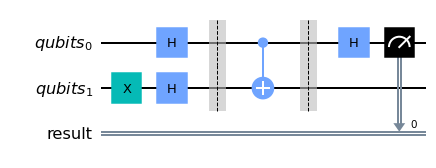

In [34]:
qr = QuantumRegister(2, name='qubits')
cr = ClassicalRegister(1, name='result')
circuit = QuantumCircuit(qr, cr)
circuit.x(qr[1])
circuit.h(qr)
circuit.barrier()
circuit.cx(qr[0], qr[1]) 
circuit.barrier()
circuit.h(qr[0])
circuit.measure(qr[0], cr[0]);
circuit.draw('mpl',justify="right")

In [35]:
job = execute(circuit, backend)
job_monitor(job)

Job Status: job has successfully run


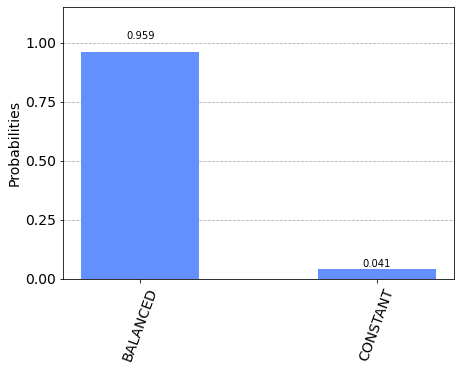

In [36]:
counts = job.result().get_counts()
counts['BALANCED'] = counts.pop('1', None)
counts['CONSTANT'] = counts.pop('0', None)  # wrong answer
plot_histogram(counts)

# [Qiskit Resources](https://qiskit.org/)
- [IBM Quantum Composer Introduction](https://quantum-computing.ibm.com/composer/docs/iqx/guide/)
- [IBM Quantum Lab Documentation](https://quantum-computing.ibm.com/lab/docs/iql/)


- [Qiskit Textbook](https://qiskit.org/textbook/preface.html)
- [Qiskit Tutorials](https://qiskit.org/documentation/tutorials.html)
- [Qiskit Videos](https://www.youtube.com/qiskit)
- [Qiskit Documentation](https://qiskit.org/documentation/)


- [Qiskit Twitter](https://twitter.com/Qiskit)
- [Qiskit Slack](https://ibm.co/joinqiskitslack)
- [Qiskit Blog](https://medium.com/qiskit)

<img src="qiskit.png" />